In [1]:
from seaborn import scatterplot as scatter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from gower.gower_dist import *

In [2]:
yahoo = pd.read_csv("yahoo Finanace_industry - Stock Market.csv", index_col=0).drop("Price", axis=1)

yahoo["market cap"] = yahoo["market cap"].str.replace("B", "", regex=False).astype(float)
test_mask = yahoo.PE_ratio.isna()
yahoo["_isinferred_PE_ratio"] = test_mask
subset = yahoo[["market cap", "PE_ratio"]]
train = subset[~test_mask]
test = subset[test_mask]
reg = RandomForestRegressor(random_state=42)
reg.fit(train.drop("PE_ratio", axis=1), train.PE_ratio)
yahoo.loc[test_mask, "PE_ratio"] = reg.predict(test.drop("PE_ratio", axis=1))

X = yahoo.drop(["Name", "Change"], axis=1)
y = yahoo.Change
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

norm_change = (yahoo.Change - yahoo.Change.mean()) / yahoo.Change.std()
yahoo["movement_category"] = "strong negative"
yahoo.loc[norm_change > -1, "movement_category"] = "weak negative"
yahoo.loc[norm_change > -0.01, "movement_category"] = "zero"
yahoo.loc[norm_change > 0.01, "movement_category"] = "weak positive"
yahoo.loc[norm_change > 1, "movement_category"] = "strong positive"
yahoo.drop("Change", axis=1, inplace=True)
print(dict(zip(*np.unique(yahoo.movement_category, return_counts=True))))

yahoo.sort_values(["_isinferred_PE_ratio", "market cap"], ascending=False).drop_duplicates("Name", keep="first")

0.9995678703780594
{'strong negative': 113, 'strong positive': 44, 'weak negative': 668, 'weak positive': 371, 'zero': 54}


,Name,market cap,PE_ratio,_isinferred_PE_ratio,movement_category
Symbol,,,,,
BRK-B,Berkshire Hathaway Inc.,709.361,28.9373,True,weak negative
KKR,KKR & Co. Inc.,54.738,9.0299,True,weak negative
V,Visa Inc.,483.440,30.8200,False,weak negative
JPM,JPMorgan Chase & Co.,392.560,9.9000,False,strong negative
MA,Mastercard Incorporated,359.499,37.8700,False,strong negative
BML-PG,Bank of America Corporation,270.350,5.7000,False,weak negative
WFC-PQ,Wells Fargo & Company,201.039,5.1800,False,weak positive
HSBC,HSBC Holdings plc,151.233,6.8000,False,zero
C-PJ,Citigroup Inc.,143.782,2.9800,False,weak positive


  0%|          | 0/2 [00:00<?, ?it/s]

[1. 1.] [4.06065176 2.51358123]


  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

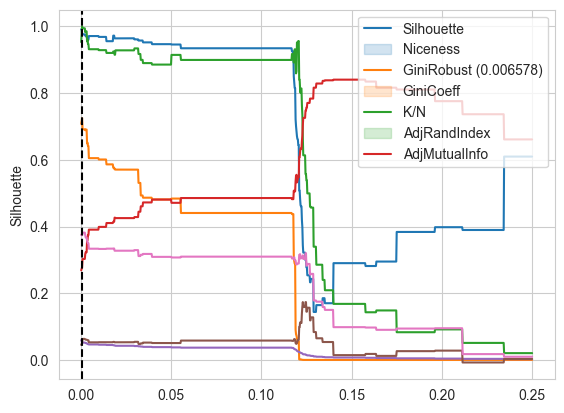

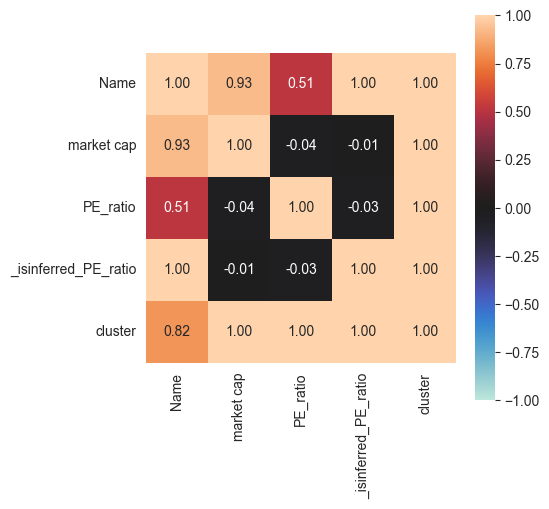

{'Silhouette': 0.9783270334223724, 'Niceness': 0.7246779974769315, 'GiniRobust': 0.006578423096537763, 'GiniCoeff': 0.27790588235294117, 'K/N': 0.0544, 'sample': {'eps': 0.00075, 'min_samples': 1}, 'counts_dict': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 22, 7: 8, 8: 19, 9: 11, 10: 12, 11: 27, 12: 16, 13: 17, 14: 18, 15: 19, 16: 20, 17: 21, 18: 22, 19: 23, 20: 24, 21: 25, 22: 25, 23: 25, 24: 25, 25: 25, 26: 25, 27: 25, 28: 25, 29: 25, 30: 25, 31: 25, 32: 25, 33: 25, 34: 25, 35: 25, 36: 25, 37: 25, 38: 25, 39: 25, 40: 51, 41: 24, 42: 50, 43: 25, 44: 25, 45: 24, 46: 23, 47: 22, 48: 21, 49: 20, 50: 19, 51: 18, 52: 17, 53: 16, 54: 15, 55: 14, 56: 13, 57: 12, 58: 11, 59: 10, 60: 9, 61: 8, 62: 7, 63: 6, 64: 5, 65: 4, 66: 5, 67: 1}, 'AdjRandIndex': 0.05022894149472197, 'AdjMutualInfo': 0.3736578698207429}


In [3]:
yahoo_ = optimize_dbscan(yahoo.drop("movement_category", axis=1), yahoo.movement_category,
                         factor=0.25, precomputed=True, chunksize=20)

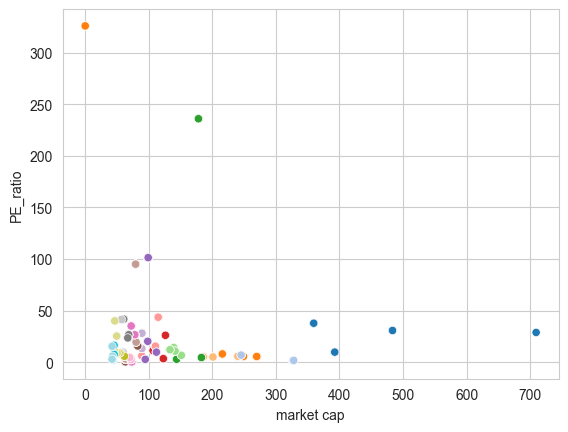

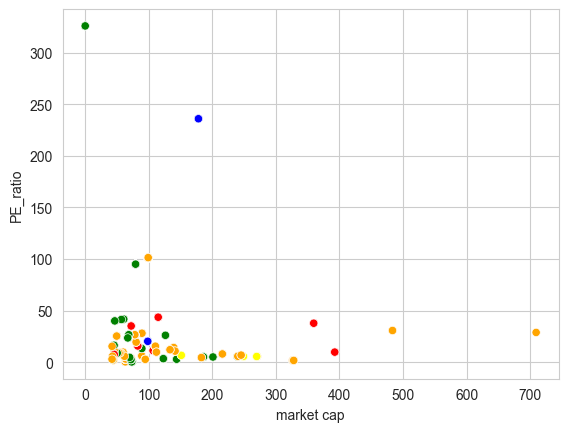

In [4]:
scatter(x=yahoo["market cap"], y=yahoo.PE_ratio, c=yahoo_.cluster.astype(int), cmap="tab20")
plt.show()
scatter(x=yahoo["market cap"], y=yahoo.PE_ratio, c=yahoo.movement_category.map({"strong negative": "red",
                                                                             "weak negative": "orange",
                                                                             "zero": "yellow",
                                                                             "weak positive": "green",
                                                                             "strong positive": "blue"}))
plt.show()
